In [ ]:
import gc
gc.collect()

233

**Downloading dataset from kaggle**

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d currie32/crimes-in-chicago

Saving kaggle.json to kaggle.json
 97% 451M/467M [00:07<00:00, 102MB/s]
100% 467M/467M [00:07<00:00, 68.3MB/s]


In [ ]:
!pip -q install pytorch_tabnet
!pip -q install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00


**Unzipping dataset**

In [ ]:
!unzip crimes-in-chicago.zip

Archive:  crimes-in-chicago.zip
  inflating: Chicago_Crimes_2001_to_2004.csv  
  inflating: Chicago_Crimes_2005_to_2007.csv  
  inflating: Chicago_Crimes_2008_to_2011.csv  
  inflating: Chicago_Crimes_2012_to_2017.csv  


**Importing modules**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics


import torch
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings('ignore')

**Reading dataset**

In [ ]:
crimes1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv',error_bad_lines=False)
crimes2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)
crimes3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv',error_bad_lines=False)
crimesx = pd.concat([crimes1, crimes2, crimes3], ignore_index=False, axis=0)

del crimes1
del crimes2
del crimes3

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [ ]:
print(f"Shape of dataframe {crimesx.shape}")

Shape of dataframe (6017767, 23)


**Reading the dataset**

In [ ]:
crimesx.head()

Unnamed: 0       ID Case Number                    Date  \
0           0  4673626    HM274058  04/02/2006 01:00:00 PM   
1           1  4673627    HM202199  02/26/2006 01:40:48 PM   
2           2  4673628    HM113861  01/08/2006 11:16:00 PM   
3           4  4673629    HM274049  04/05/2006 06:45:00 PM   
4           5  4673630    HM187120  02/17/2006 09:03:14 PM   

                 Block  IUCR   Primary Type                   Description  \
0    055XX N MANGO AVE  2825  OTHER OFFENSE       HARASSMENT BY TELEPHONE   
1   065XX S RHODES AVE  2017      NARCOTICS            MANU/DELIVER:CRACK   
2      013XX E 69TH ST  051A        ASSAULT           AGGRAVATED: HANDGUN   
3  061XX W NEWPORT AVE  0460        BATTERY                        SIMPLE   
4      037XX W 60TH ST  1811      NARCOTICS  POSS: CANNABIS 30GMS OR LESS   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False  ...  45.0            11.0        26   
1             SIDEWALK    True  ...  20.0            42.0        18   
2                OTHER   False  ...   5.0            69.0       04A   
3            RESIDENCE   False  ...  38.0            17.0       08B   
4                ALLEY    True  ...  13.0            65.0        18   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1136872.0     1936499.0  2006  04/15/2016 08:55:02 AM  41.981913   
1     1181027.0     1861693.0  2006  04/15/2016 08:55:02 AM  41.775733   
2     1186023.0     1859609.0  2006  04/15/2016 08:55:02 AM  41.769897   
3     1134772.0     1922299.0  2006  04/15/2016 08:55:02 AM  41.942984   
4     1152412.0     1864560.0  2006  04/15/2016 08:55:02 AM  41.784211   

   Longitude                       Location  
0 -87.771996  (41.981912692, -87.771996382)  
1 -87.611920  (41.775732538, -87.611919814)  
2 -87.593671  (41.769897392, -87.593670899)  
3 -87.780057  (41.942984005, -87.780056951)  
4 -87.716745   (41.784210853, -87.71674491)  

[5 rows x 23 columns]

**Drop duplicates**

In [ ]:
crimesx = crimesx.drop_duplicates()
print(crimesx.shape)

(4336556, 23)


**Drop rows with NULL values**

In [ ]:
crimesx = crimesx.dropna()
print(crimesx.shape)

(4273756, 23)


**Describing columns of data**

In [ ]:
crimesx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273756 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

**sampling dataset**

In [ ]:
crimes = crimesx.sample(n=100000,random_state=42)

In [ ]:
del crimesx

In [ ]:
crimes.shape

(100000, 23)

**Removing irrelevant columns**

In [ ]:
# Remove irrelevant/not meaningfull attributes
crimes = crimes.drop(['Unnamed: 0'], axis=1)
crimes = crimes.drop(['ID'], axis=1)
crimes = crimes.drop(['Case Number'], axis=1)

**Visualizing the places where most crimes occur**

In [ ]:
import folium
import folium.plugins as plugins
import time
from folium.plugins import HeatMapWithTime
import datetime


In [ ]:
cumulative = crimes[['Latitude','Longitude','Date']]

In [ ]:
lat_long_list = []
for i in cumulative['Date'].unique():
    temp=[]
    for index, instance in cumulative[cumulative['Date'] == i].iterrows():
        temp.append([instance['Latitude'],instance['Longitude']])
    lat_long_list.append(temp)


In [ ]:
#converting it to datetime format
cumulative['Date']= pd.to_datetime((cumulative['Date'])).dt.strftime('%Y/%m/%d,%H:%M:%S')

time_index = []
for i in cumulative['Date'].unique():
  time_index.append(i)

In [ ]:
my_map = folium.Map(location=[41.8781,-87.6298],tiles='cartodbdark_matter',zoom_start=10)


hm = HeatMapWithTime(data=lat_long_list,
                     index=time_index,
                     radius=12,
                     auto_play=True,
                     max_opacity=0.9)
hm.add_to(my_map)

my_map

**Label Encoding**

In [ ]:
df = crimes

In [ ]:
del crimes

In [ ]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['Arrest'] = pd.factorize(df["Arrest"])[0]
df['Domestic'] = pd.factorize(df["Domestic"])[0]
#df['IUCR'] = pd.factorize(df["IUCR"])[0]
#df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0]

In [ ]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


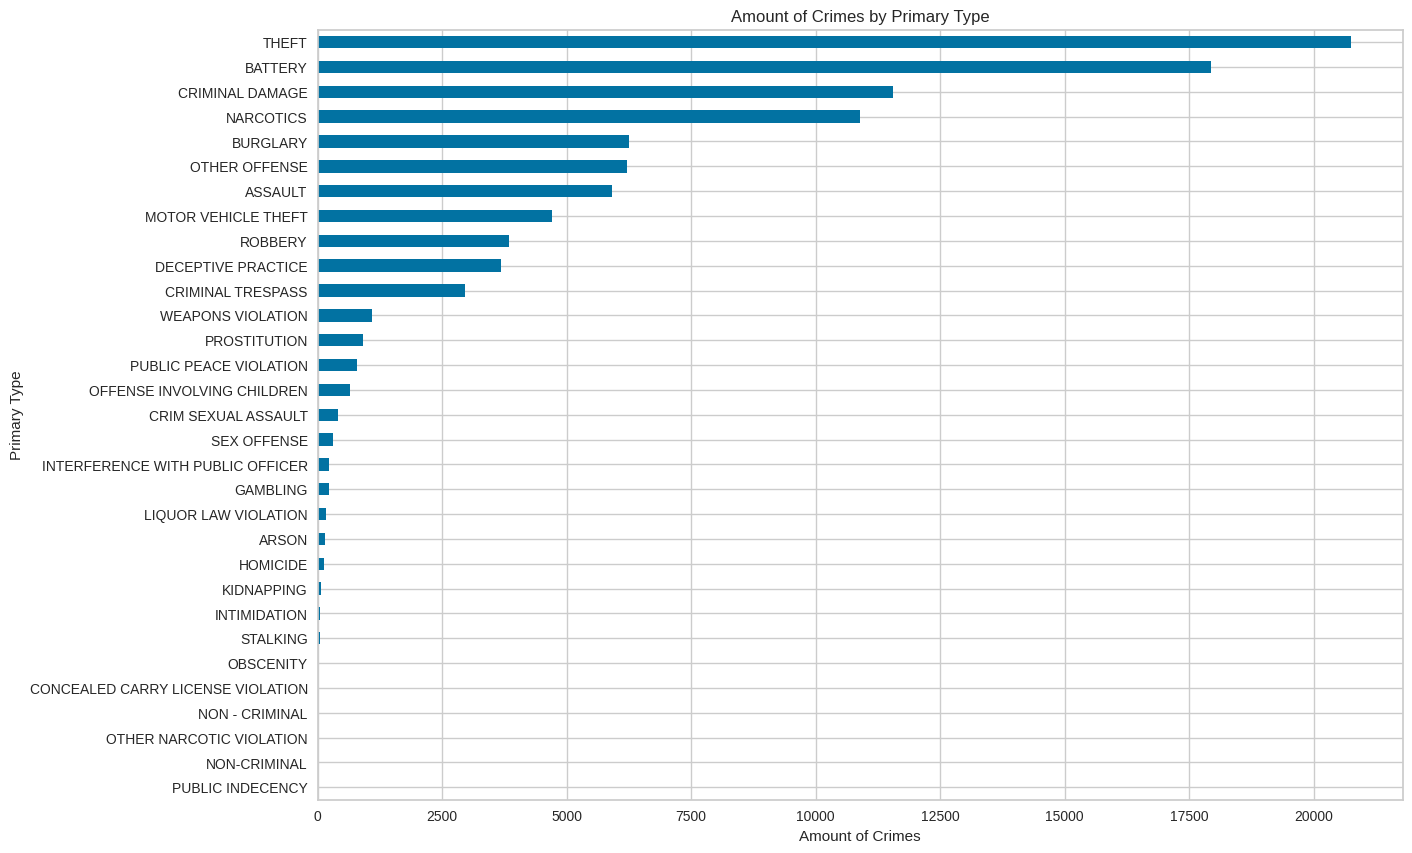

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()


In [ ]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

Primary Type  Amt
9                            GAMBLING  228
14               LIQUOR LAW VIOLATION  179
0                               ARSON  150
10                           HOMICIDE  125
13                         KIDNAPPING   74
12                       INTIMIDATION   56
28                           STALKING   48
19                          OBSCENITY    7
4   CONCEALED CARRY LICENSE VIOLATION    5
18                       NON-CRIMINAL    3
17                     NON - CRIMINAL    3
21           OTHER NARCOTIC VIOLATION    3
24                   PUBLIC INDECENCY    1

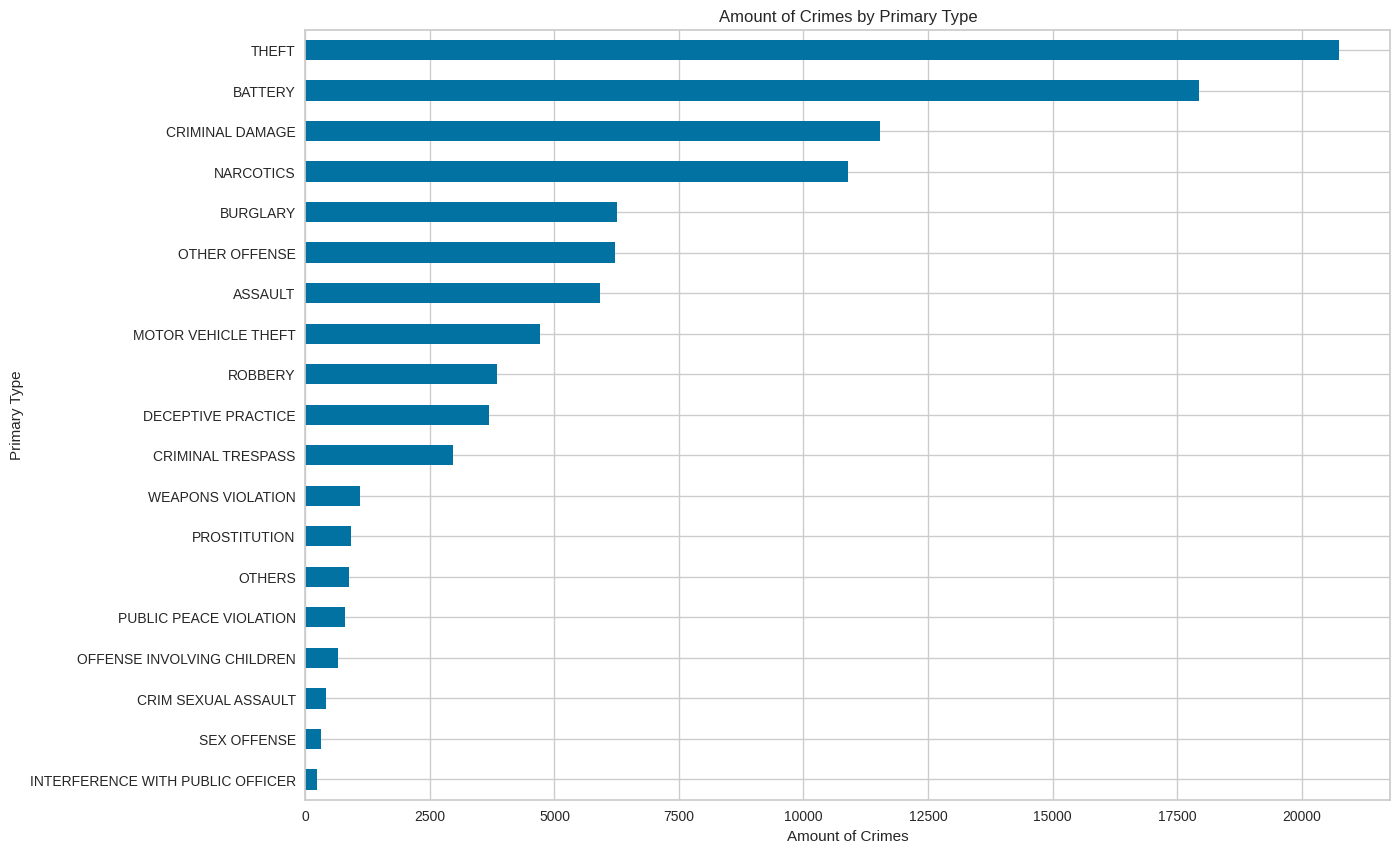

In [ ]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [ ]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['BATTERY', 'NARCOTICS', 'ASSAULT', 'THEFT', 'ROBBERY', 'BURGLARY',
       'CRIMINAL DAMAGE', 'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT',
       'CRIMINAL TRESPASS', 'OTHER OFFENSE', 'OTHERS', 'PROSTITUTION',
       'DECEPTIVE PRACTICE', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'WEAPONS VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER'], dtype=object)

In [ ]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0]
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

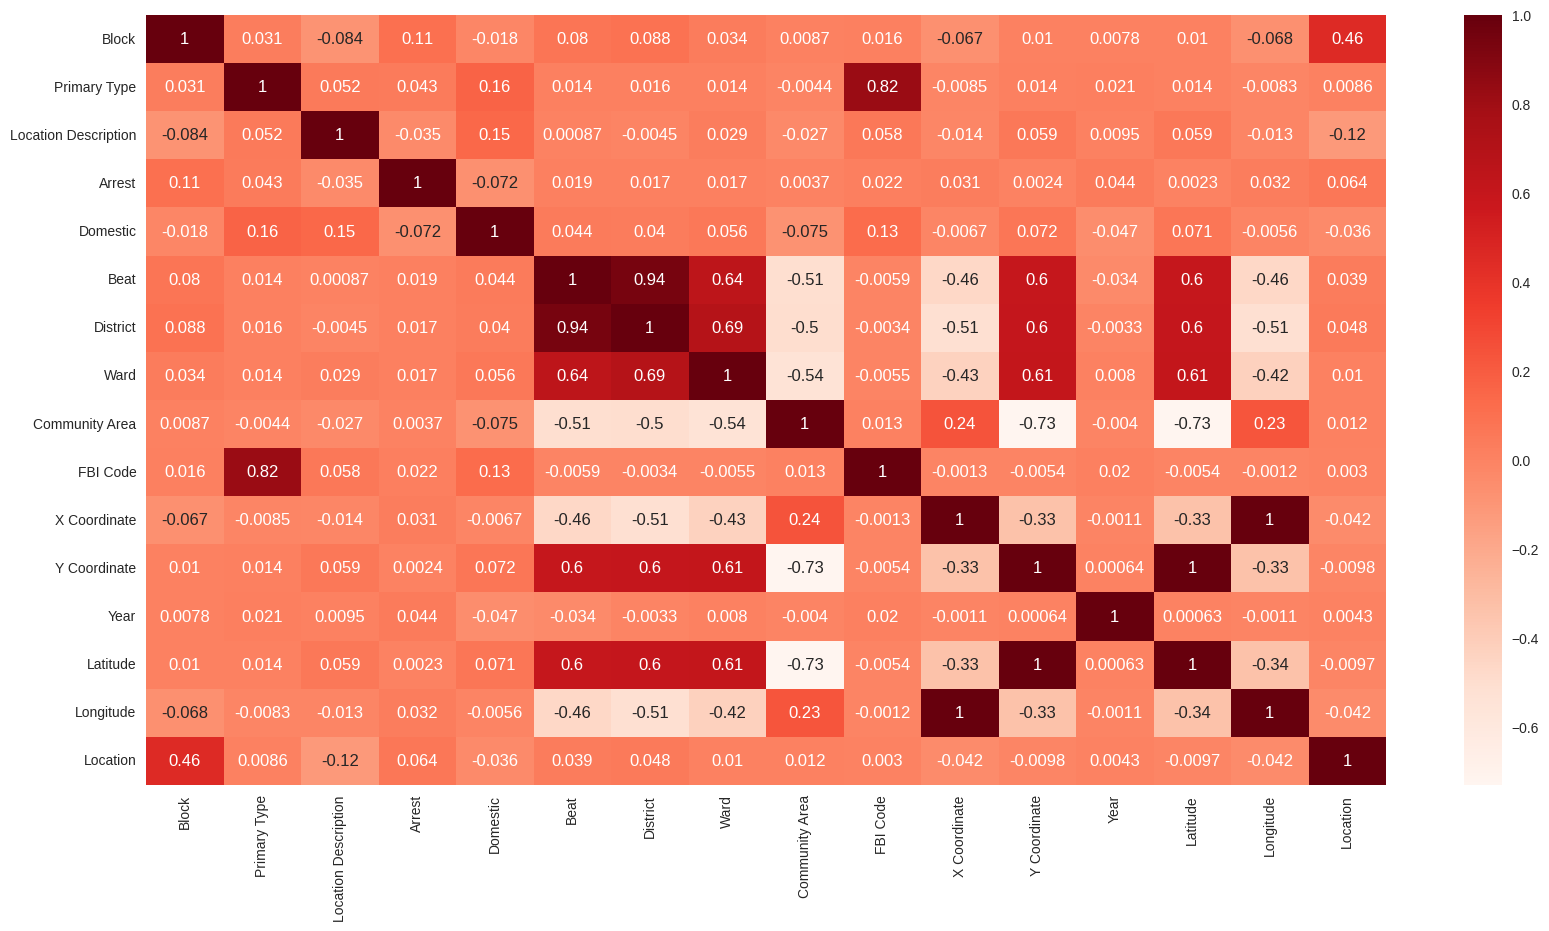

In [ ]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X = X_fs[['Arrest','Domestic','Block','Beat','District','Ward','FBI Code','Community Area','X Coordinate','Y Coordinate']]


In [ ]:
X.head(5)

Arrest  Domestic  Block  Beat  District  Ward  FBI Code  \
1120703       0         0      0   922       9.0  11.0         0   
1036250       0         1      1  1123      11.0  28.0         1   
164595        1         1      2   612       6.0  17.0         2   
214833        1         1      3   214       2.0   3.0         3   
1371599       1         1      4   611       6.0  21.0         4   

         Community Area  X Coordinate  Y Coordinate  
1120703            59.0     1164948.0     1880535.0  
1036250            27.0     1153560.0     1899324.0  
164595             71.0     1169666.0     1853389.0  
214833             38.0     1179822.0     1877577.0  
1371599            71.0     1166394.0     1851953.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y_fs,test_size = 0.2, random_state= 42)

In [ ]:
del df,X,Y_fs

**SEQUENTIAL model**

In [ ]:
# X_train = X_train.values.reshape(X_train.shape[0],X_train.shape[1],1)
# # X_test = X_test.values.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
 from sklearn.preprocessing import StandardScaler

 sc= StandardScaler()
 X_scaled_train = sc.fit_transform(X_train)
 X_scaled_test = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 3, verbose = 1,
                                min_delta = 1e-4, min_lr = 1e-6, mode = 'min', cooldown=1)

In [ ]:
history = model.fit(X_scaled_train,y_train,epochs=20,validation_data = (X_scaled_test,y_test),batch_size=32,callbacks=[rlr])

Epoch 1/20
2500/2500 [==============================] - 12s 4ms/step - loss: 0.4885 - accuracy: 0.8535 - val_loss: 0.1919 - val_accuracy: 0.9424 - lr: 0.0010
Epoch 2/20
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2074 - accuracy: 0.9379 - val_loss: 0.1548 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 3/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.1824 - accuracy: 0.9434 - val_loss: 0.1450 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 4/20
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1662 - accuracy: 0.9477 - val_loss: 0.1358 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 5/20
2500/2500 [==============================] - 14s 6ms/step - loss: 0.1542 - accuracy: 0.9515 - val_loss: 0.1345 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 6/20
2500/2500 [==============================] - 9s 3ms/step - loss: 0.1525 - accuracy: 0.9509 - val_loss: 0.1262 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 7/20
2500/2500 [==============================] 

In [ ]:
y_pred_prob = model.predict(X_scaled_test)

625/625 [==============================] - 1s 2ms/step


**Probability of each crime for X_test**

In [ ]:
df_dnn = pd.DataFrame(np.round_(y_pred_prob,10),columns=Classes)
df_dnn.head(-5)

BATTERY     NARCOTICS       ASSAULT  THEFT       ROBBERY  \
0      1.000000e-10  9.999996e-01  9.000000e-10    0.0  0.000000e+00   
1      0.000000e+00  0.000000e+00  0.000000e+00    1.0  1.000000e-10   
2      1.300000e-09  9.999990e-01  8.000000e-10    0.0  0.000000e+00   
3      0.000000e+00  0.000000e+00  0.000000e+00    1.0  2.000000e-10   
4      0.000000e+00  0.000000e+00  0.000000e+00    1.0  1.000000e-10   
...             ...           ...           ...    ...           ...   
19990  0.000000e+00  0.000000e+00  0.000000e+00    1.0  0.000000e+00   
19991  9.999999e-01  4.000000e-10  0.000000e+00    0.0  0.000000e+00   
19992  0.000000e+00  0.000000e+00  0.000000e+00    1.0  0.000000e+00   
19993  9.999992e-01  0.000000e+00  0.000000e+00    0.0  0.000000e+00   
19994  0.000000e+00  0.000000e+00  0.000000e+00    0.0  0.000000e+00   

       BURGLARY  CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0      0.000000         0.000000             0.000000                  0.0   
1      0.000000         0.000000             0.000000                  0.0   
2      0.000000         0.000000             0.000000                  0.0   
3      0.000000         0.000000             0.000000                  0.0   
4      0.000000         0.000000             0.000000                  0.0   
...         ...              ...                  ...                  ...   
19990  0.000000         0.000000             0.000000                  0.0   
19991  0.000000         0.000000             0.000000                  0.0   
19992  0.000000         0.000000             0.000000                  0.0   
19993  0.000000         0.000000             0.000000                  0.0   
19994  0.000053         0.999797             0.000115                  0.0   

       CRIMINAL TRESPASS  OTHER OFFENSE        OTHERS  PROSTITUTION  \
0                    0.0   0.000000e+00  3.835000e-07  0.000000e+00   
1                    0.0   0.000000e+00  0.000000e+00  0.000000e+00   
2                    0.0   0.000000e+00  9.793000e-07  0.000000e+00   
3                    0.0   0.000000e+00  0.000000e+00  0.000000e+00   
4                    0.0   0.000000e+00  0.000000e+00  0.000000e+00   
...                  ...            ...           ...           ...   
19990                0.0   0.000000e+00  0.000000e+00  0.000000e+00   
19991                0.0   0.000000e+00  0.000000e+00  0.000000e+00   
19992                0.0   0.000000e+00  0.000000e+00  0.000000e+00   
19993                0.0   1.000000e-09  9.100000e-09  7.479000e-07   
19994                0.0   0.000000e+00  0.000000e+00  0.000000e+00   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0            0.000000e+00                     0.0          0.0   
1            0.000000e+00                     0.0          0.0   
2            0.000000e+00                     0.0          0.0   
3            0.000000e+00                     0.0          0.0   
4            0.000000e+00                     0.0          0.0   
...                   ...                     ...          ...   
19990        0.000000e+00                     0.0          0.0   
19991        0.000000e+00                     0.0          0.0   
19992        0.000000e+00                     0.0          0.0   
19993        1.000000e-10                     0.0          0.0   
19994        0.000000e+00                     0.0          0.0   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.000000                0.0   
1                        0.000000                0.0   
2                        0.000000                0.0   
3                        0.000000                0.0   
4                        0.000000                0.0   
...                           ...                ...   
19990                    0.000000                0.0   
19991                    0.000000                0.0   
19992                    0.000000                0.0   
1999

**RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=X_train,
             y=y_train)

# Prediction
result = rf_model.predict(X_test)

y_pred_prob_rf = rf_model.predict_proba(X_test)
df_rf_prob = pd.DataFrame(y_pred_prob_rf,columns=Classes)

In [ ]:
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.9328
Recall      :  0.9328
Precision   :  0.9258105312430205
F1 Score    :  0.9328
Confusion Matrix: 
[[3566    0    0    0    0    0    0    0    0    4   30    0    8   18
     3    0    0    0    0]
 [   2 2149    8    1    0    0    0    0    0   63    3    0    0    0
     0    0    0    0    0]
 [   5    0 1101   21    0    0    0    0    0    7    3    0    0    0
     0    0    0    0    0]
 [   0    0    4 4109    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    1    2  714    3   11    0    0    5    0    0    0    0
     0    0    0    0    0]
 [   0    0    1    1    0 1306    9    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0 2274    0    0    6    2    0    0    0
     0    0    0    0    0]
 [   0    0    3    0    0    0    6    0   72    0    0    0    0    0
     0    0    0    0    0]
 [   0    0   14    0    0    0    7 

================= Classification Report =================

                                  precision    recall  f1-score   support

                         BATTERY       0.98      0.98      0.98      3629
                       NARCOTICS       0.97      0.97      0.97      2226
                         ASSAULT       0.96      0.97      0.97      1137
                           THEFT       0.99      1.00      1.00      4113
                         ROBBERY       1.00      0.97      0.98       736
                        BURGLARY       1.00      0.99      0.99      1317
                 CRIMINAL DAMAGE       0.98      1.00      0.99      2282
             CRIM SEXUAL ASSAULT       0.00      0.00      0.00        81
             MOTOR VEHICLE THEFT       0.92      0.97      0.95       937
               CRIMINAL TRESPASS       0.60      0.63      0.62       601
                   OTHER OFFENSE       0.74      0.85      0.79      1226
                          OTHERS       0.71      0.1

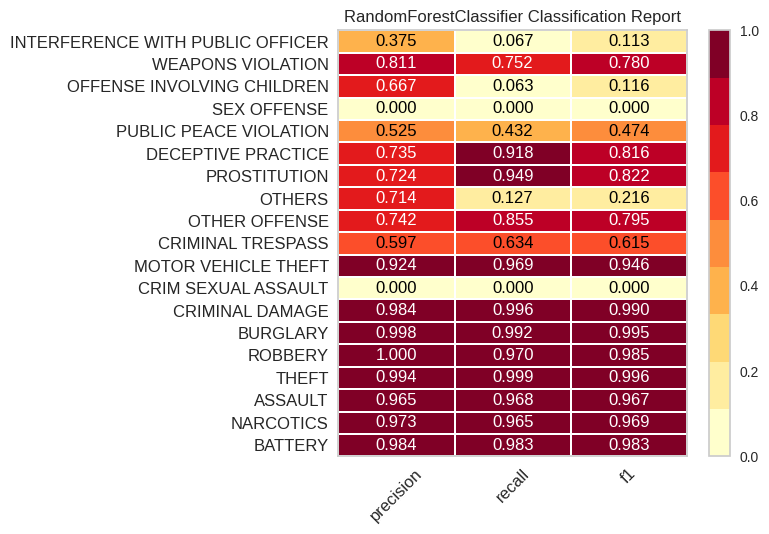

In [ ]:
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(X_test,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()

**Probability for each crime using random forest**

In [ ]:
df_rf_prob

BATTERY  NARCOTICS   ASSAULT     THEFT   ROBBERY  BURGLARY  \
0      0.033001   0.907052  0.018705  0.019807  0.003123  0.003078   
1      0.014490   0.000332  0.010753  0.959266  0.000408  0.003195   
2      0.001442   0.998384  0.000174  0.000000  0.000000  0.000000   
3      0.019953   0.002632  0.005819  0.966739  0.000000  0.000286   
4      0.007519   0.000000  0.009839  0.982642  0.000000  0.000000   
...         ...        ...       ...       ...       ...       ...   
19995  0.007589   0.000000  0.013837  0.003175  0.002385  0.007284   
19996  0.000000   1.000000  0.000000  0.000000  0.000000  0.000000   
19997  0.016666   0.000729  0.015505  0.955385  0.000000  0.002286   
19998  0.006242   0.000000  0.013913  0.977360  0.000311  0.002174   
19999  0.006282   0.000000  0.015418  0.012845  0.030888  0.074023   

       CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0             0.001035             0.000000             0.000348   
1             0.006474             0.000408             0.001970   
2             0.000000             0.000000             0.000000   
3             0.002857             0.000000             0.000000   
4             0.000000             0.000000             0.000000   
...                ...                  ...                  ...   
19995         0.027517             0.038271             0.815332   
19996         0.000000             0.000000             0.000000   
19997         0.005714             0.000000             0.000857   
19998         0.000000             0.000000             0.000000   
19999         0.773433             0.002426             0.030211   

       CRIMINAL TRESPASS  OTHER OFFENSE    OTHERS  PROSTITUTION  \
0               0.003377       0.001370  0.002854      0.000627   
1               0.000739       0.001063  0.000000      0.000000   
2               0.000000       0.000000  0.000000      0.000000   
3               0.000286       0.000000  0.000000      0.000000   
4               0.000000       0.000000  0.000000      0.000000   
...                  ...            ...       ...           ...   
19995           0.001891       0.044994  0.004016      0.000000   
19996           0.000000       0.000000  0.000000      0.000000   
19997           0.000000       0.000857  0.000000      0.000000   
19998           0.000000       0.000000  0.000000      0.000000   
19999           0.006032       0.027012  0.000000      0.000000   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0                0.000966                0.000000     0.000070   
1                0.000901                0.000000     0.000000   
2                0.000000                0.000000     0.000000   
3                0.000571                0.000000     0.000857   
4                0.000000                0.000000     0.000000   
...                   ...                     ...          ...   
19995            0.018937                0.001151     0.002324   
19996            0.000000                0.000000     0.000000   
19997            0.000571                0.000571     0.000000   
19998            0.000000                0.000000     0.000000   
19999            0.018029                0.001361     0.000332   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.000000           0.004587   
1                        0.000000           0.000000   
2                        0.000000           0.000000   
3                        0.000000           0.000000   
4                        0.000000           0.000000   
...                           ...                ...   
19995                    0.010064           0.000849   
19996                    0.000000           0.000000   
19997                    0.000000           0.000857   
19998                    0.000000           0.000000   
19999                    0.000786           0.000922   

       INTERFERENCE WITH PUBLIC OFFICER  
0                              0.0000

**XGBOOST**

[17:29:08] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

========== XGB Results ==========
Accuracy    :  0.9651
Recall      :  0.9651
Precision   :  0.9680616700644877
F1 Score    :  0.9651
Confusion Matrix: 
[[3629    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 2099    0    0    0    0    0    0    0  126    1    0    0    0
     0    0    0    0    0]
 [   0    0 1137    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 4113    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  736    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1317    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0 2282    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0   81    0    0    0    0  

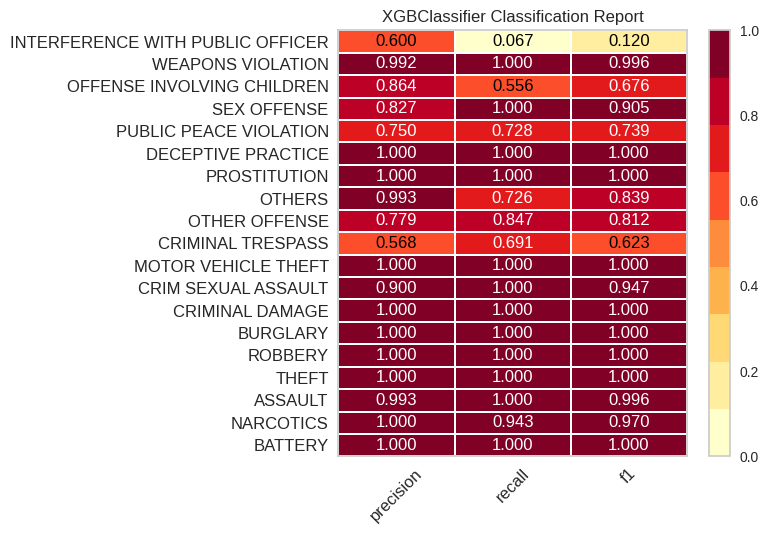

In [ ]:
xgb = XGBClassifier(booster =  'gbtree',
                        n_jobs = 4,
                        objective = 'multi:softmax',
                        silent = 0,
                        subsample = 1,
                        learning_rate = 0.01,
                        max_depth = 4,
                        min_child_weight = 2,
                        colsample_bytree = 1,
                        n_estimators= 200,
                        reg_lambda= 1)

xgb.fit(X_train, y_train)

result = xgb.predict(X_test)
df_xgb_prob = pd.DataFrame(xgb.predict_proba(X_test),columns=Classes)

ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== XGB Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

target_names = Classes
visualizer = ClassificationReport(xgb, classes=target_names)
visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(X_test,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()

**Probability of crimes using xgb**

In [ ]:
df_xgb_prob

BATTERY  NARCOTICS   ASSAULT     THEFT   ROBBERY  BURGLARY  \
0      0.011781   0.787793  0.011793  0.011793  0.011788  0.011787   
1      0.011777   0.011840  0.011784  0.787819  0.011784  0.011783   
2      0.011781   0.787793  0.011793  0.011793  0.011788  0.011787   
3      0.011777   0.011840  0.011784  0.787819  0.011784  0.011783   
4      0.011777   0.011840  0.011784  0.787819  0.011784  0.011783   
...         ...        ...       ...       ...       ...       ...   
19995  0.011783   0.011846  0.011790  0.011782  0.011782  0.011782   
19996  0.011781   0.787793  0.011793  0.011793  0.011788  0.011787   
19997  0.011777   0.011840  0.011784  0.787819  0.011784  0.011783   
19998  0.011777   0.011840  0.011784  0.787819  0.011784  0.011783   
19999  0.011779   0.011842  0.011786  0.011778  0.011778  0.011778   

       CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0             0.011786             0.011785             0.011785   
1             0.011782             0.011782             0.011781   
2             0.011786             0.011785             0.011785   
3             0.011782             0.011782             0.011781   
4             0.011782             0.011782             0.011781   
...                ...                  ...                  ...   
19995         0.011782             0.011782             0.787523   
19996         0.011786             0.011785             0.011785   
19997         0.011782             0.011782             0.011781   
19998         0.011782             0.011782             0.011781   
19999         0.787797             0.011784             0.011784   

       CRIMINAL TRESPASS  OTHER OFFENSE    OTHERS  PROSTITUTION  \
0               0.011785       0.011785  0.011802      0.011781   
1               0.011781       0.011781  0.011798      0.011777   
2               0.011785       0.011785  0.011802      0.011781   
3               0.011781       0.011781  0.011798      0.011777   
4               0.011781       0.011781  0.011798      0.011777   
...                  ...            ...       ...           ...   
19995           0.011787       0.011787  0.011804      0.011783   
19996           0.011785       0.011785  0.011802      0.011781   
19997           0.011781       0.011781  0.011798      0.011777   
19998           0.011781       0.011781  0.011798      0.011777   
19999           0.011783       0.011783  0.011800      0.011779   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0                0.011781                0.011785     0.011781   
1                0.011777                0.011781     0.011777   
2                0.011781                0.011785     0.011781   
3                0.011777                0.011781     0.011777   
4                0.011777                0.011781     0.011777   
...                   ...                     ...          ...   
19995            0.011783                0.011787     0.011783   
19996            0.011781                0.011785     0.011781   
19997            0.011777                0.011781     0.011777   
19998            0.011777                0.011781     0.011777   
19999            0.011779                0.011783     0.011779   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.011785           0.011780   
1                        0.011782           0.011776   
2                        0.011785           0.011780   
3                        0.011782           0.011776   
4                        0.011782           0.011776   
...                           ...                ...   
19995                    0.012001           0.011783   
19996                    0.011785           0.011780   
19997                    0.011782           0.011776   
19998                    0.011782           0.011776   
19999                    0.011784           0.011779   

       INTERFERENCE WITH PUBLIC OFFICER  
0                              0.0118

**TABNET**

In [ ]:
from yellowbrick.contrib.wrapper import wrap
trch = TabNetClassifier(
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=0.01),
        scheduler_params={
            "step_size":10, # how to use learning rate scheduler
            "gamma":0.9
        },
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type='entmax', # "sparsemax",
        verbose=25 # print every 25 epochs
    )

    # fit the model
trch.fit(
        X_train.values,y_train,
        eval_set=[(X_train.values, y_train), (X_test.values, y_test)],
        eval_name=['train', 'valid'],
        eval_metric=['accuracy'],
        max_epochs=30, patience=20,
        batch_size=128,
        num_workers=4,
        weights=1,
        drop_last=False
    )


result = trch.predict(X_test.values)
df_torch_prob = pd.DataFrame(trch.predict_proba(X_test.values),columns=Classes)

ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== TABNET Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

target_names = Classes
trch_wrap = wrap(trch)
# visualizer = ClassificationReport(trch_wrap, classes=target_names)
# visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
# visualizer.score(X_test,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()


epoch 0  | loss: 1.34554 | train_accuracy: 0.91671 | valid_accuracy: 0.9171  |  0:00:26s
epoch 25 | loss: 0.35732 | train_accuracy: 0.7845  | valid_accuracy: 0.77645 |  0:11:25s
Stop training because you reached max_epochs = 30 with best_epoch = 27 and best_valid_accuracy = 0.96445
========== TABNET Results ==========
Accuracy    :  0.96445
Recall      :  0.96445
Precision   :  0.9659343980288139
F1 Score    :  0.96445
Confusion Matrix: 
[[3629    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 2099    0    0    0    0    0    0    0  126    1    0    0    0
     0    0    0    0    0]
 [   0    0 1137    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 4113    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  736    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1317    0    0    0    0    0  

In [ ]:
df_torch_prob.head()

**CAT BOOST**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Early stop iteration :  199
========== CATBOOST Results ==========
Accuracy    :  0.9383
Recall      :  0.9383
Precision   :  0.916862440660848
F1 Score    :  0.9383
Confusion Matrix: 
[[3629    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 2099    0    0    0    0    0    0    0  126    1    0    0    0
     0    0    0    0    0]
 [   0    0 1137    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 4113    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  736    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 1317    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0 2282    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0   81    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    

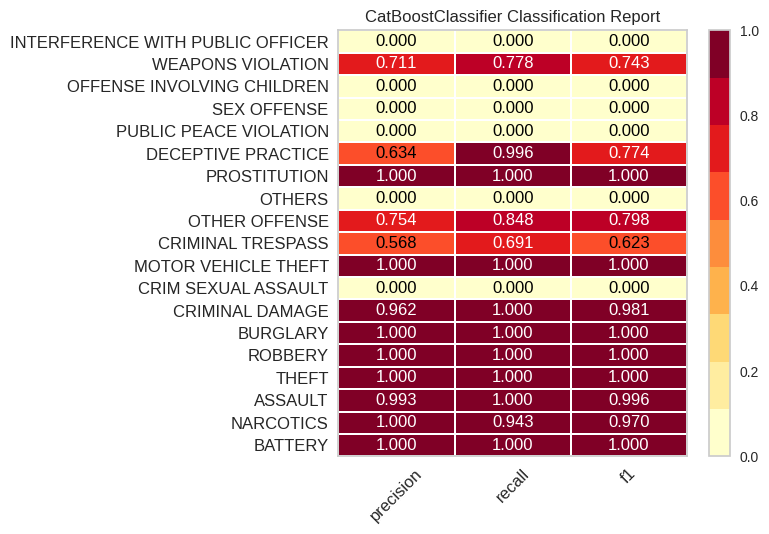

In [ ]:
from yellowbrick.contrib.wrapper import wrap
clf = CatBoostClassifier(iterations=200,max_depth=6,random_seed=42,learning_rate=0.01,custom_loss=['AUC', 'Accuracy'])

clf.fit(X_train, y_train,eval_set=(X_test, y_test),verbose=False,plot=True)
early_stop = clf.get_best_iteration()
print("Early stop iteration : ",early_stop)

result = clf.predict(X_test.values)
df_cnn_prob = pd.DataFrame(clf.predict_proba(X_test),columns=Classes)

ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== CATBOOST Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

target_names = Classes

clf_wrap = wrap(clf)
visualizer = ClassificationReport(clf_wrap, classes=target_names)
visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(X_test,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()


In [ ]:
df_cnn_prob

BATTERY  NARCOTICS   ASSAULT     THEFT   ROBBERY  BURGLARY  \
0      0.009220   0.843425  0.030516  0.011252  0.009289  0.008172   
1      0.008242   0.007677  0.019995  0.851183  0.014262  0.009236   
2      0.009220   0.843425  0.030516  0.011252  0.009289  0.008172   
3      0.008242   0.007677  0.019995  0.851183  0.014262  0.009236   
4      0.008242   0.007677  0.019995  0.851183  0.014262  0.009236   
...         ...        ...       ...       ...       ...       ...   
19995  0.015555   0.012731  0.089748  0.012267  0.016783  0.026224   
19996  0.009220   0.843425  0.030516  0.011252  0.009289  0.008172   
19997  0.008242   0.007677  0.019995  0.851183  0.014262  0.009236   
19998  0.008242   0.007677  0.019995  0.851183  0.014262  0.009236   
19999  0.008444   0.008111  0.016061  0.010096  0.015419  0.027030   

       CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0             0.008670             0.007108             0.008095   
1             0.009701             0.007388             0.009030   
2             0.008670             0.007108             0.008095   
3             0.009701             0.007388             0.009030   
4             0.009701             0.007388             0.009030   
...                ...                  ...                  ...   
19995         0.039629             0.022224             0.629752   
19996         0.008670             0.007108             0.008095   
19997         0.009701             0.007388             0.009030   
19998         0.009701             0.007388             0.009030   
19999         0.803256             0.014497             0.026540   

       CRIMINAL TRESPASS  OTHER OFFENSE    OTHERS  PROSTITUTION  \
0               0.006571       0.006407  0.006587      0.006487   
1               0.006401       0.006488  0.006394      0.006232   
2               0.006571       0.006407  0.006587      0.006487   
3               0.006401       0.006488  0.006394      0.006232   
4               0.006401       0.006488  0.006394      0.006232   
...                  ...            ...       ...           ...   
19995           0.019139       0.029808  0.011638      0.011424   
19996           0.006571       0.006407  0.006587      0.006487   
19997           0.006401       0.006488  0.006394      0.006232   
19998           0.006401       0.006488  0.006394      0.006232   
19999           0.008011       0.009692  0.006978      0.006779   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0                0.006301                0.006365     0.006353   
1                0.006216                0.006307     0.006268   
2                0.006301                0.006365     0.006353   
3                0.006216                0.006307     0.006268   
4                0.006216                0.006307     0.006268   
...                   ...                     ...          ...   
19995            0.013299                0.010509     0.008720   
19996            0.006301                0.006365     0.006353   
19997            0.006216                0.006307     0.006268   
19998            0.006216                0.006307     0.006268   
19999            0.006286                0.006651     0.006209   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.006486           0.006335   
1                        0.006452           0.006252   
2                        0.006486           0.006335   
3                        0.006452           0.006252   
4                        0.006452           0.006252   
...                           ...                ...   
19995                    0.011875           0.010130   
19996                    0.006486           0.006335   
19997                    0.006452           0.006252   
19998                    0.006452           0.006252   
19999                    0.007489           0.006238   

       INTERFERENCE WITH PUBLIC OFFICER  
0                              0.0063

**1DCNN WITH XGBOOST**

Epoch 1/20
2500/2500 [==============================] - 15s 4ms/step - loss: 0.8319 - accuracy: 0.7363 - val_loss: 0.3097 - val_accuracy: 0.9171
Epoch 2/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3782 - accuracy: 0.8795 - val_loss: 0.2430 - val_accuracy: 0.9294
Epoch 3/20
2500/2500 [==============================] - 11s 4ms/step - loss: 0.3113 - accuracy: 0.9001 - val_loss: 0.2268 - val_accuracy: 0.9215
Epoch 4/20
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2767 - accuracy: 0.9105 - val_loss: 0.1889 - val_accuracy: 0.9389
Epoch 5/20
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2605 - accuracy: 0.9185 - val_loss: 0.2052 - val_accuracy: 0.9344
Epoch 6/20
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2506 - accuracy: 0.9214 - val_loss: 0.1683 - val_accuracy: 0.9447
Epoch 7/20
2500/2500 [==============================] - 11s 5ms/step - loss: 0.2348 - accuracy: 0.9262 - val_loss: 0.1670 - val_ac

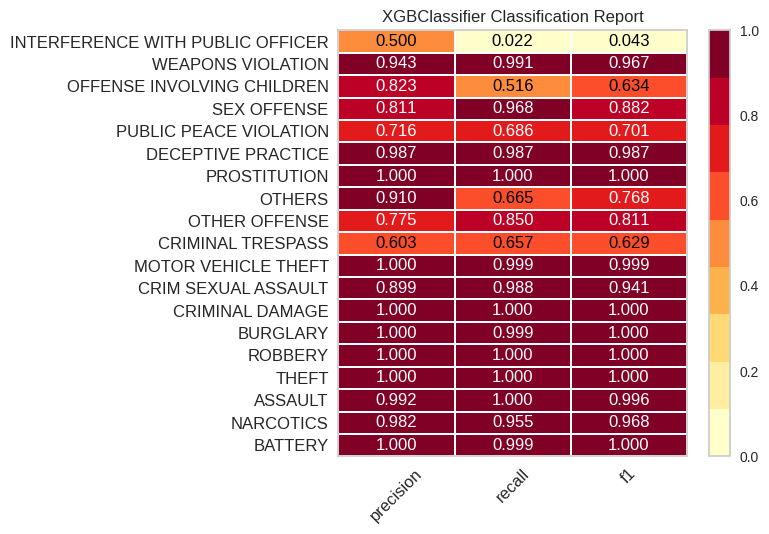

In [ ]:

# Reshape data for 1D CNN
X_train_scaled_re = X_scaled_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled_re = X_scaled_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Create 1D CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train 1D CNN model
model.fit(X_train_scaled_re, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled_re, y_test))

# Extract feature layer from 1D CNN model
feature_layer_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-3].output)
X_train_features = feature_layer_model.predict(X_train_scaled_re)
X_test_features = feature_layer_model.predict(X_test_scaled_re)

# Create XGBoostClassifier
xgb_clf = XGBClassifier(booster =  'gbtree',
                        n_jobs = 4,
                        objective = 'multi:softmax',
                        silent = 0,
                        subsample = 1,
                        learning_rate = 0.01,
                        max_depth = 4,
                        min_child_weight = 2,
                        colsample_bytree = 1,
                        n_estimators= 200,
                        reg_lambda= 1)

# Fit XGBoostClassifier using 1D CNN features
xgb_clf.fit(X_train_features, y_train)

# Evaluate XGBoostClassifier on test data
accuracy = xgb_clf.score(X_test_features, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

result = xgb_clf.predict(X_test_features)
df_xgb_cnn_prob = pd.DataFrame(xgb_clf.predict_proba(X_test_features),columns = Classes)

ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== CATBOOST Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

target_names = Classes
visualizer = ClassificationReport(xgb_clf, classes=target_names)
visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(X_test_features,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()



In [ ]:
df_xgb_cnn_prob

BATTERY  NARCOTICS   ASSAULT     THEFT   ROBBERY  BURGLARY  \
0      0.011751   0.787277  0.012397  0.011760  0.011825  0.011745   
1      0.011762   0.011789  0.011793  0.787757  0.011759  0.011755   
2      0.011757   0.787638  0.011774  0.011765  0.012000  0.011750   
3      0.011762   0.011789  0.011793  0.787756  0.011761  0.011755   
4      0.011762   0.011789  0.011793  0.787754  0.011764  0.011755   
...         ...        ...       ...       ...       ...       ...   
19995  0.011564   0.011591  0.011573  0.011573  0.011564  0.011558   
19996  0.011760   0.787830  0.011777  0.011768  0.011759  0.011753   
19997  0.011762   0.011789  0.011793  0.787754  0.011763  0.011755   
19998  0.011762   0.011789  0.011793  0.787757  0.011759  0.011755   
19999  0.012343   0.012371  0.012352  0.012352  0.012360  0.072660   

       CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0             0.011745             0.011761             0.011745   
1             0.011755             0.011772             0.011755   
2             0.011750             0.011766             0.011750   
3             0.011755             0.011771             0.011755   
4             0.011755             0.011771             0.011755   
...                ...                  ...                  ...   
19995         0.011558             0.011677             0.787298   
19996         0.011753             0.011769             0.011753   
19997         0.011755             0.011771             0.011755   
19998         0.011755             0.011772             0.011755   
19999         0.715975             0.013291             0.012363   

       CRIMINAL TRESPASS  OTHER OFFENSE    OTHERS  PROSTITUTION  \
0               0.011751       0.011751  0.011852      0.011774   
1               0.011761       0.011762  0.011863      0.011784   
2               0.011756       0.011757  0.011858      0.011779   
3               0.011761       0.011762  0.011863      0.011784   
4               0.011761       0.011762  0.011863      0.011784   
...                  ...            ...       ...           ...   
19995           0.011639       0.011682  0.013755      0.011586   
19996           0.011759       0.011760  0.011861      0.011782   
19997           0.011761       0.011762  0.011863      0.011784   
19998           0.011761       0.011762  0.011863      0.011784   
19999           0.012342       0.012343  0.012449      0.012366   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0                0.011876                0.011761     0.011746   
1                0.011886                0.011771     0.011757   
2                0.011881                0.011766     0.011752   
3                0.011886                0.011771     0.011757   
4                0.011886                0.011771     0.011757   
...                   ...                     ...          ...   
19995            0.011687                0.011573     0.011559   
19996            0.011884                0.011769     0.011755   
19997            0.011886                0.011771     0.011757   
19998            0.011886                0.011771     0.011757   
19999            0.012473                0.012352     0.012337   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.011822           0.011886   
1                        0.011833           0.011897   
2                        0.011827           0.011892   
3                        0.011833           0.011897   
4                        0.011833           0.011897   
...                           ...                ...   
19995                    0.013279           0.011697   
19996                    0.011830           0.011895   
19997                    0.011833           0.011897   
19998                    0.011833           0.011897   
19999                    0.012417           0.012484   

       INTERFERENCE WITH PUBLIC OFFICER  
0                              0.0117

**BAGGING CLASSIFIER**

========== Bagging Results ==========
Accuracy    :  0.95055
Recall      :  0.95055
Precision   :  0.9467209840396476
F1 Score    :  0.95055
Confusion Matrix: 
[[3622    0    0    7    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   7 2156    0    3    0    0    1    0    0   28   30    0    0    0
     0    0    0    0    1]
 [   4    2 1128    2    0    0    0    0    0    1    0    0    0    0
     0    0    0    0    0]
 [   1    0    0 4112    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    1    0    7  727    0    0    0    0    1    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    1    0 1316    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    4    0    0 2278    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    1    0    0   79    1    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    3    0    0    0    

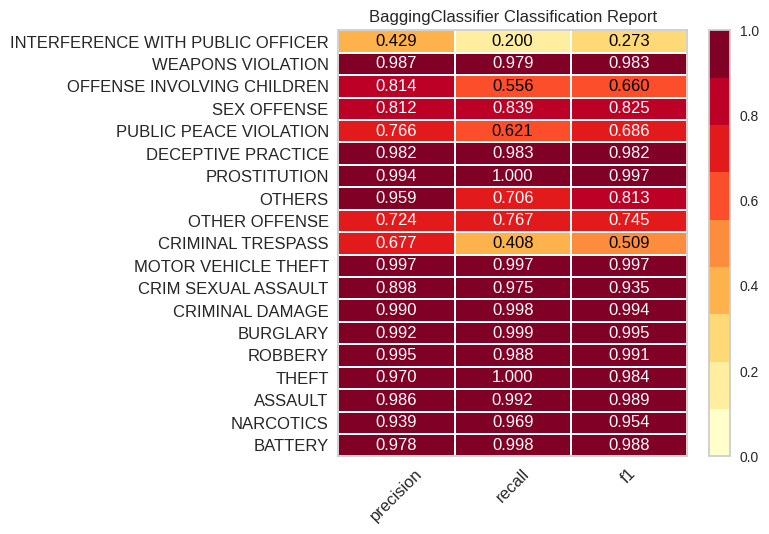

In [ ]:
bagg = BaggingClassifier(n_jobs = -1,
                         n_estimators = 200,
                         max_features = 4
                        )

bagg.fit(X_train, y_train)


result = bagg.predict(X_test)
df_bagg_prob = pd.DataFrame(bagg.predict_proba(X_test),columns=Classes)

ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Bagging Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

target_names = Classes
visualizer = ClassificationReport(bagg, classes=target_names)
visualizer.fit(X=X_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(X_test,y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()

In [ ]:
df_bagg_prob

BATTERY  NARCOTICS   ASSAULT     THEFT   ROBBERY  BURGLARY  \
0      0.046496   0.567062  0.002547  0.095592  0.204874  0.008354   
1      0.031896   0.005549  0.014022  0.599032  0.162103  0.081763   
2      0.040966   0.694428  0.049639  0.053306  0.068847  0.004411   
3      0.135282   0.002863  0.010637  0.587490  0.017194  0.058795   
4      0.029399   0.230376  0.088972  0.487387  0.013906  0.018456   
...         ...        ...       ...       ...       ...       ...   
19995  0.053937   0.002697  0.003172  0.141355  0.006271  0.096653   
19996  0.040360   0.658475  0.010213  0.037254  0.011839  0.031261   
19997  0.031563   0.028923  0.004159  0.455183  0.058447  0.007714   
19998  0.023108   0.005530  0.004956  0.690111  0.006852  0.004293   
19999  0.144825   0.000093  0.027164  0.128958  0.041979  0.047482   

       CRIMINAL DAMAGE  CRIM SEXUAL ASSAULT  MOTOR VEHICLE THEFT  \
0             0.023163             0.000033             0.007894   
1             0.062770             0.000000             0.003815   
2             0.010753             0.000025             0.001745   
3             0.015943             0.000000             0.003416   
4             0.034666             0.001553             0.072475   
...                ...                  ...                  ...   
19995         0.155816             0.003245             0.469781   
19996         0.025105             0.000084             0.008496   
19997         0.284037             0.001423             0.070189   
19998         0.057878             0.000111             0.016477   
19999         0.514158             0.013236             0.006388   

       CRIMINAL TRESPASS  OTHER OFFENSE    OTHERS  PROSTITUTION  \
0               0.027539       0.002859  0.006470      0.002364   
1               0.014750       0.012879  0.000392      0.000000   
2               0.032062       0.003627  0.000583      0.025967   
3               0.003101       0.151902  0.000496      0.000000   
4               0.000807       0.014551  0.001644      0.000000   
...                  ...            ...       ...           ...   
19995           0.003629       0.050761  0.000699      0.001105   
19996           0.004669       0.155514  0.001357      0.000360   
19997           0.002659       0.029955  0.000368      0.001751   
19998           0.002481       0.151173  0.000882      0.000060   
19999           0.005037       0.031420  0.000000      0.005140   

       DECEPTIVE PRACTICE  PUBLIC PEACE VIOLATION  SEX OFFENSE  \
0                0.001954                0.000780     0.000175   
1                0.011030                0.000000     0.000000   
2                0.000144                0.010651     0.000581   
3                0.010380                0.000000     0.001643   
4                0.001553                0.000119     0.002565   
...                   ...                     ...          ...   
19995            0.009176                0.000477     0.000344   
19996            0.001222                0.010620     0.000069   
19997            0.001698                0.000500     0.001708   
19998            0.000409                0.000647     0.000238   
19999            0.026421                0.000000     0.000000   

       OFFENSE INVOLVING CHILDREN  WEAPONS VIOLATION  \
0                        0.000351           0.001438   
1                        0.000000           0.000000   
2                        0.000358           0.000901   
3                        0.000612           0.000250   
4                        0.000581           0.000991   
...                           ...                ...   
19995                    0.000338           0.000121   
19996                    0.000249           0.002187   
19997                    0.005165           0.014502   
19998                    0.000000           0.034793   
19999                    0.007696           0.000000   

       INTERFERENCE WITH PUBLIC OFFICER  
0                              0.0000

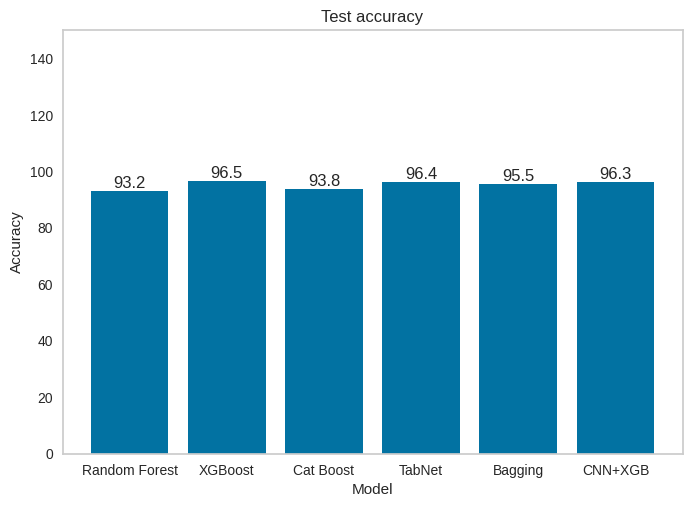

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = ['Random Forest','XGBoost','Cat Boost','TabNet', 'Bagging','CNN+XGB']
accuracy = [93.2,96.5,93.8,96.4,95.5,96.3]

fig, ax = plt.subplots()


# Create the bar chart
ax.bar(X, accuracy)

# Annotate the values
for i, v in enumerate(accuracy):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom')

# Add title and axis labels
plt.ylim(0, 150)
plt.grid(visible=False)
ax.set_title('Test accuracy')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.show()